In [41]:
import pandas as pd

In [42]:
df = pd.read_csv("Wiingy.csv")

In [43]:
df

,Student ID,Country,City,Grade,Subject,Lead Source,Source Platform,Gender Preference
0,052798ae-c5c7-424b-b027-fd83375b14e7,United States,"Redding,CA,US",Working Professional,Singing,Website,Website-Organic,Both
1,86054134-7bc3-4163-b7ef-4bb94055ed89,United States,"Mississippi County,MO,US",Working Professional,Singing,Meta,Meta,Female
2,ec5023de-62a6-46d6-a109-7f74ccd6ce3e,United States of America,Alto,Grade 10,Singing,Website,Website-Organic,Female
3,ec5023de-62a6-46d6-a109-7f74ccd6ce3e,United States of America,Alto,NaN,NaN,Website,Website-Organic,Female
4,119f87d2-4fd3-4684-9619-2e629b8f6337,United States,"Miramar,FL,US",Grade 5,Singing,Website,Website-Google_Ads,Female
...,...,...,...,...,...,...,...,...
955,f5511040-a725-4cdc-9f46-deae78de4bd0,United States,"Denver,CO,US",College,GED Math,Website,Website-Organic,Female
956,36e4bc15-dce7-47e4-9f33-57d9ca263c04,United States,Hayward,Grade 1,Piano,Website,Website-Google_Ads,Female
957,d6939759-81d0-46bd-a166-14219d6a7dc6,United States,Reston,College,Singing,Website,Website-Google_Ads,Female
958,48626230-c29c-4e93-b482-9bcf0adeafdb,United States,"Austin,TX,US",Working Professional,Piano,Partner,Website-Google_Ads,Male


In [5]:
# 1.1 Total inquiries (rows)
total_inquiries = df.shape[0]
print("Total inquiries:", total_inquiries)

Total inquiries: 960


In [6]:
# 1.2 How many unique students? 
unique_students = df['Student ID'].nunique()
print("Unique students:", unique_students)

Unique students: 613


In [10]:
# 2.1 Missing values per column
print("Missing values:\n", df.isnull().sum())

Missing values:
 Student ID             0
Country                0
City                  63
Grade                512
Subject              297
Lead Source            0
Source Platform        1
Gender Preference     79
dtype: int64


In [13]:
# 2.2 Check for duplicate full rows
duplicate_rows = df.duplicated().sum()
print("Duplicate rows:", duplicate_rows)

Duplicate rows: 277


In [14]:
# 2.2 Check if any students inquired multiple times
duplicate_students = df['Student ID'].duplicated().sum()
print("Duplicate student inquiries:", duplicate_students)

Duplicate student inquiries: 347


In [17]:

# 2.3 Note any anomalies or inconsistencies

# 1. Check unique values in categorical columns
print("Unique Subjects:", df['Subject'].unique())
print("Unique Lead Sources:", df['Lead Source'].unique())
print("Unique Source Platforms:", df['Source Platform'].unique())
print("Unique Gender Preferences:", df['Gender Preference'].unique())
print("Unique Cities (first 20):", df['City'].unique()[:20])
print("Unique Grades:", df['Grade'].unique())

Unique Subjects: ['Singing' nan 'Guitar' 'Piano' 'French' 'Spanish' 'Computer Science'
 'Classical Violin' 'piano' 'Violin' 'singing' 'Python' 'guitar' 'Chess'
 'GCSE Chemistry' 'Artificial Intelligence' 'R Studio' 'Algebra'
 'AP Psychology' 'Math' 'Algebra 2' 'AP Chemistry' 'Adult Math' 'Yoga'
 'guitar ' 'AutoCAD' 'Databases' 'ACT Math' 'Physics' 'Year 5 Maths'
 'Year 12 Maths' '6th Grade Math' 'Accounting' 'GED Math' 'English'
 '11th Grade Math' 'SAT Math' 'R programming' 'Business Calculus'
 '5th Grade Math']
Unique Lead Sources: ['Website' 'Meta' 'Bark' 'Partner' 'App']
Unique Source Platforms: ['Website-Organic' 'Meta' 'Website-Google_Ads' 'Bark' 'Partner' 'App' nan]
Unique Gender Preferences: ['Both' 'Female' nan 'Male' 'Prefer not to say']
Unique Cities (first 20): ['Redding,CA,US' 'Mississippi County,MO,US' 'Alto' 'Miramar,FL,US'
 'Houston,TX,US' nan 'Lake Los Angeles,CA,US' 'Miami County,IN,US'
 'Los Angeles' 'Naracoorte and Lucindale,SA,AU' 'New York'
 'New York City,NY,US' '

In [19]:
# 2.4 Check for duplicate Student IDs (multiple inquiries by same student)
duplicates = df[df.duplicated(subset=['Student ID'], keep=False)]
print(f"Number of duplicate student inquiries: {len(duplicates)}")
display(duplicates.head()) 

Number of duplicate student inquiries: 517


,Student ID,Country,City,Grade,Subject,Lead Source,Source Platform,Gender Preference
0,052798ae-c5c7-424b-b027-fd83375b14e7,United States,"Redding,CA,US",Working Professional,Singing,Website,Website-Organic,Both
1,86054134-7bc3-4163-b7ef-4bb94055ed89,United States,"Mississippi County,MO,US",Working Professional,Singing,Meta,Meta,Female
2,ec5023de-62a6-46d6-a109-7f74ccd6ce3e,United States of America,Alto,Grade 10,Singing,Website,Website-Organic,Female
3,ec5023de-62a6-46d6-a109-7f74ccd6ce3e,United States of America,Alto,NaN,NaN,Website,Website-Organic,Female
4,119f87d2-4fd3-4684-9619-2e629b8f6337,United States,"Miramar,FL,US",Grade 5,Singing,Website,Website-Google_Ads,Female


In [117]:
# 3️ Initial Observations


# 3.1 Which column has the most missing data?
missing_summary = df.isnull().sum().reset_index()
missing_summary.columns = ['Column Name', 'Missing Count']
missing_summary['Missing Percentage'] = (missing_summary['Missing Count'] / len(df)) * 100
missing_summary = missing_summary.sort_values(by='Missing Count', ascending=False)
print(" Missing Data Summary:")
display(missing_summary)

# Identify the column with the most missing data
most_missing_col = missing_summary.iloc[0]['Column Name']
print(f"\n Column with the most missing data: {most_missing_col}")



 Missing Data Summary:


,Column Name,Missing Count,Missing Percentage
7,Gender Preference,79,8.229167
2,City,63,6.562500
8,Cost_per_Lead,35,3.645833
6,Source Platform,1,0.104167
3,Grade,0,0.000000
1,Country,0,0.000000
0,Student ID,0,0.000000
5,Lead Source,0,0.000000
4,Subject,0,0.000000
9,Education_Level,0,0.000000



 Column with the most missing data: Gender Preference


In [ ]:
 3.3 What time period does this data likely cover? 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot missing data as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

🔹 Distribution of missing values across rows:


,Number of Missing Columns,Number of Rows
0,0,430
1,2,260
2,1,196
3,3,60
4,4,14


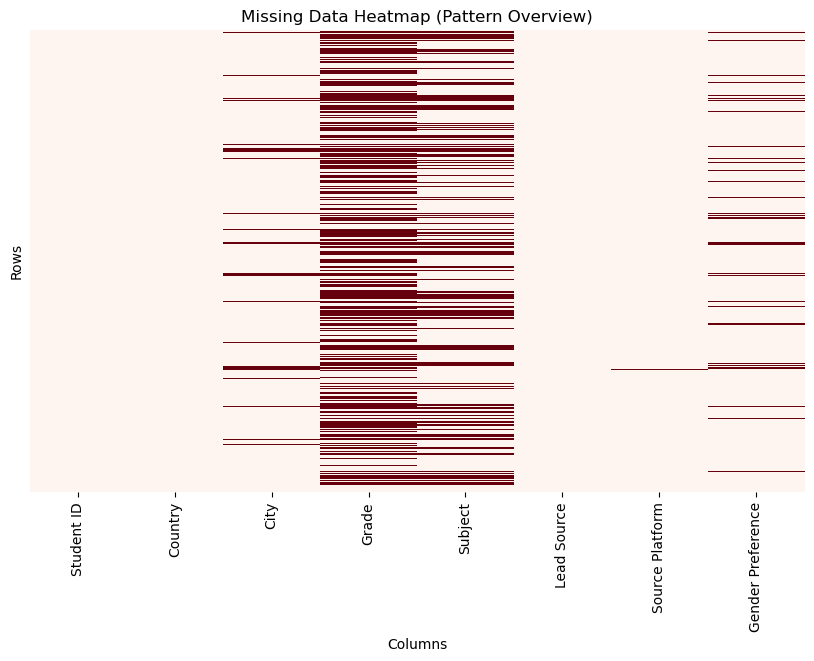

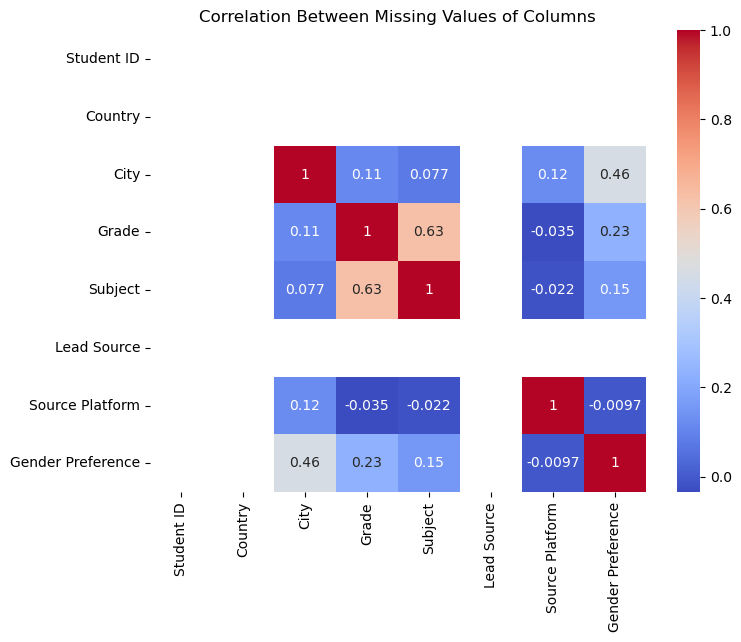

In [24]:
#3.2 Are there any patterns in the missing data?
# ---------------------------------------------------------
# Objective:
# - Identify if certain columns tend to have missing values together
# - Detect rows with multiple missing fields
# - Visualize the pattern of missingness

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Summary of missing values per row
missing_pattern = df.isnull().sum(axis=1).value_counts().reset_index()
missing_pattern.columns = ['Number of Missing Columns', 'Number of Rows']
print("Distribution of missing values across rows:")
display(missing_pattern)

# Visualize missing data pattern as a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='Reds', yticklabels=False)
plt.title("Missing Data Heatmap (Pattern Overview)")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

# Optional deeper check: see if specific columns are missing together
corr_missing = df.isnull().corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_missing, cmap='coolwarm', annot=True)
plt.title("Correlation Between Missing Values of Columns")
plt.show()

In [ ]:
 3.3 What time period does this data likely cover? 

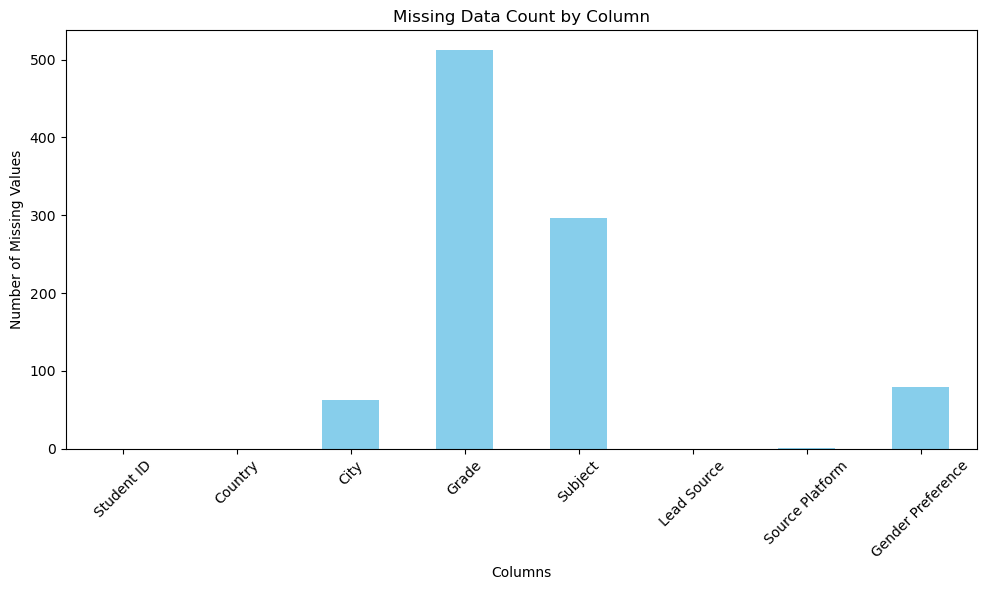

In [27]:
import matplotlib.pyplot as plt

# Count of missing values per column
missing_counts = df.isnull().sum()

# Plot
plt.figure(figsize=(10, 6))
missing_counts.plot(kind='bar', color='skyblue')
plt.title('Missing Data Count by Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [28]:
# ---------------------------------------------------------
# 3.3 What time period does this data likely cover?
# ---------------------------------------------------------
# Objective:
# - Identify if the dataset contains any date or timestamp column
# - Determine the start and end period of the data
# - Get a sense of how recent or old the inquiries are

import pandas as pd

# Load dataset
df = pd.read_csv("Wiingy.csv")

# Display all columns to identify potential date columns
print("🔹 Columns in dataset:")
print(df.columns.tolist())

# Try to identify date-related columns (commonly named as 'Date', 'Created At', etc.)
date_columns = [col for col in df.columns if 'date' in col.lower() or 'time' in col.lower() or 'created' in col.lower()]
print("\n🔹 Potential date columns detected:", date_columns)

# If a date column exists, analyze it
if len(date_columns) > 0:
    for col in date_columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')
        print(f"\n📅 Summary for column: {col}")
        print(f"Start date: {df[col].min()}")
        print(f"End date:   {df[col].max()}")
        print(f"Total duration (days): {(df[col].max() - df[col].min()).days}")
else:
    print("\n⚠️ No date or time column found — dataset likely doesn’t include timestamps.")

🔹 Columns in dataset:
['Student ID', 'Country', 'City', 'Grade', 'Subject', 'Lead Source', 'Source Platform', 'Gender Preference']

🔹 Potential date columns detected: []

⚠️ No date or time column found — dataset likely doesn’t include timestamps.


In [58]:
import pandas as pd

df = pd.read_csv("Wiingy.csv")
print(df.columns.tolist())


['Student ID', 'Country', 'City', 'Grade', 'Subject', 'Lead Source', 'Source Platform', 'Gender Preference']


In [47]:
df.columns = df.columns.str.strip()  # removes spaces before/after


In [59]:
df.columns = df.columns.str.replace(" ", "_")


  Lead Source  Count  Percentage
0     Website    536       55.83
1        Bark    383       39.90
2     Partner     36        3.75
3        Meta      4        0.42
4         App      1        0.10


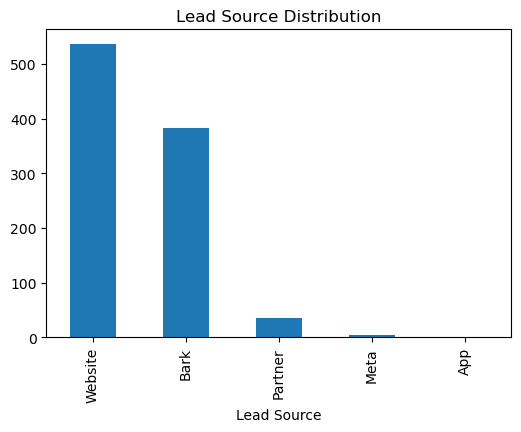

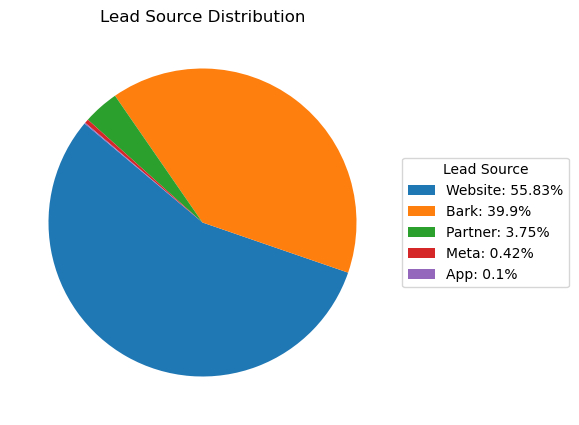

In [68]:
#1. Lead Source Distribution
# Count and percentage of leads across sources
lead_source_dist = df['Lead Source'].value_counts(normalize=False).reset_index()
lead_source_dist.columns = ['Lead Source', 'Count']
lead_source_dist['Percentage'] = (lead_source_dist['Count'] / lead_source_dist['Count'].sum() * 100).round(2)

print(lead_source_dist)

# Visualization
import matplotlib.pyplot as plt

#bar chart
lead_source_dist.set_index('Lead Source')['Count'].plot(kind='bar', figsize=(6,4), title="Lead Source Distribution")
plt.show()

# Pie chart without labels or percentages inside slices
plt.figure(figsize=(7,5))
plt.pie(
    lead_source_dist['Count'],
    labels=None,      # No labels inside
    startangle=140    # Start angle for slices
)

# Add legend in the corner with lead names and their percentages
plt.legend(
    [f"{row['Lead Source']}: {row['Percentage']}%" for _, row in lead_source_dist.iterrows()],
    title="Lead Source",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.title("Lead Source Distribution")
plt.show()


In [63]:
#2. Platform-Level Performance
# Rank platforms (Website-Organic, Website-Google_Ads, Meta, Bark)
platform_rank = df['Source Platform'].value_counts(normalize=True).reset_index()
platform_rank.columns = ['Source_Platform', 'Percentage']
platform_rank['Percentage'] = (platform_rank['Percentage'] * 100).round(2)

print(platform_rank)

      Source_Platform  Percentage
0                Bark       39.73
1     Website-Organic       28.78
2  Website-Google_Ads       26.69
3             Partner        3.44
4                Meta        1.25
5                 App        0.10


      Source Platform  Percentage
0                Bark       39.73
1     Website-Organic       28.78
2  Website-Google_Ads       26.69
3             Partner        3.44
4                Meta        1.25
5                 App        0.10


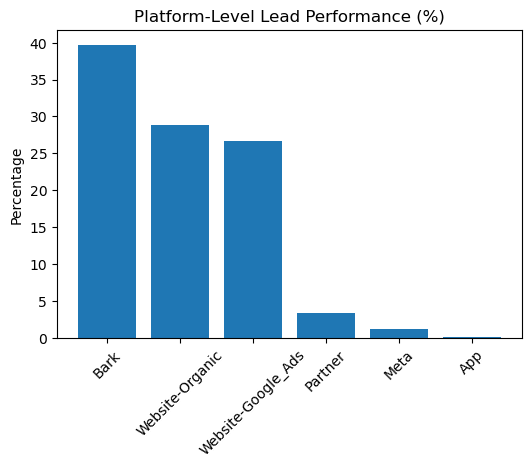

In [69]:
platform_rank = df['Source Platform'].value_counts(normalize=True).reset_index()
platform_rank.columns = ['Source Platform', 'Percentage']
platform_rank['Percentage'] = (platform_rank['Percentage'] * 100).round(2)

print(platform_rank)

# Bar Chart
plt.figure(figsize=(6,4))
plt.bar(platform_rank['Source Platform'], platform_rank['Percentage'])
plt.title("Platform-Level Lead Performance (%)")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
plt.show()

In [70]:
#3. Website Traffic Breakdown
# Leads from Organic vs Google Ads
website_breakdown = df[df['Lead Source'] == 'Website']['Source Platform'].value_counts(normalize=True).reset_index()
website_breakdown.columns = ['Source Platform', 'Percentage']
website_breakdown['Percentage'] = (website_breakdown['Percentage'] * 100).round(2)

print(website_breakdown) 

      Source Platform  Percentage
0     Website-Organic       51.49
1  Website-Google_Ads       47.01
2                Meta        1.49


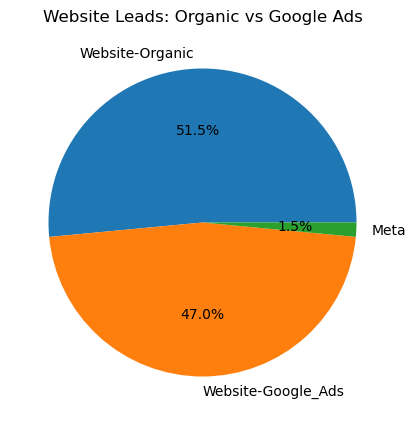

In [72]:
# Pie Chart
plt.figure(figsize=(5,5))
plt.pie(website_breakdown['Percentage'], labels=website_breakdown['Source Platform'], autopct='%1.1f%%')
plt.title("Website Leads: Organic vs Google Ads")
plt.show()


In [76]:
#4. Cost Analysis
# Defining  costs
cost_dict = {
    "Website-Organic": 0,
    "Website-Google_Ads": 15,
    "Meta": 20,
    "Bark": 25
}

df['Cost_per_Lead'] = df['Source Platform'].map(cost_dict)
total_spend = df['Cost_per_Lead'].sum()
avg_cpl = df['Cost_per_Lead'].mean()

print("Total Estimated Spend:", total_spend)
print("Average Cost per Lead:", round(avg_cpl,2))

# Best value = lowest cost per lead
value = df.groupby('Source Platform')['Cost_per_Lead'].mean().sort_values()
print("Best Value Channel:\n", value)

Total Estimated Spend: 13605.0
Average Cost per Lead: 14.71
Best Value Channel:
 Source Platform
Website-Organic        0.0
Website-Google_Ads    15.0
Meta                  20.0
Bark                  25.0
App                    NaN
Partner                NaN
Name: Cost_per_Lead, dtype: float64


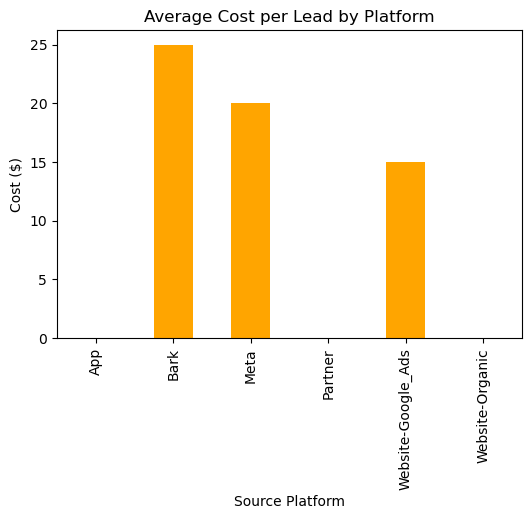

In [77]:
plt.figure(figsize=(6,4))
df.groupby('Source Platform')['Cost_per_Lead'].mean().plot(kind='bar', color='orange')
plt.title("Average Cost per Lead by Platform")
plt.ylabel("Cost ($)")
plt.show()


In [78]:
#5. Country Distribution
country_dist = df['Country'].value_counts(normalize=False).reset_index()
country_dist.columns = ['Country', 'Count']
country_dist['Percentage'] = (country_dist['Count'] / country_dist['Count'].sum() * 100).round(2)

print(country_dist)

                                              Country  Count  Percentage
0                                       United States    518       53.96
1                                      United Kingdom    244       25.42
2                            United States of America     35        3.65
3                                              Canada     32        3.33
4                                               India     32        3.33
5                                                Iraq     29        3.02
6                                           Australia     21        2.19
7                                             Nigeria     13        1.35
8                                              Norway      6        0.62
9   United Kingdom of Great Britain and Northern I...      5        0.52
10                                           Pakistan      4        0.42
11                               United Arab Emirates      4        0.42
12                                        New Zeala

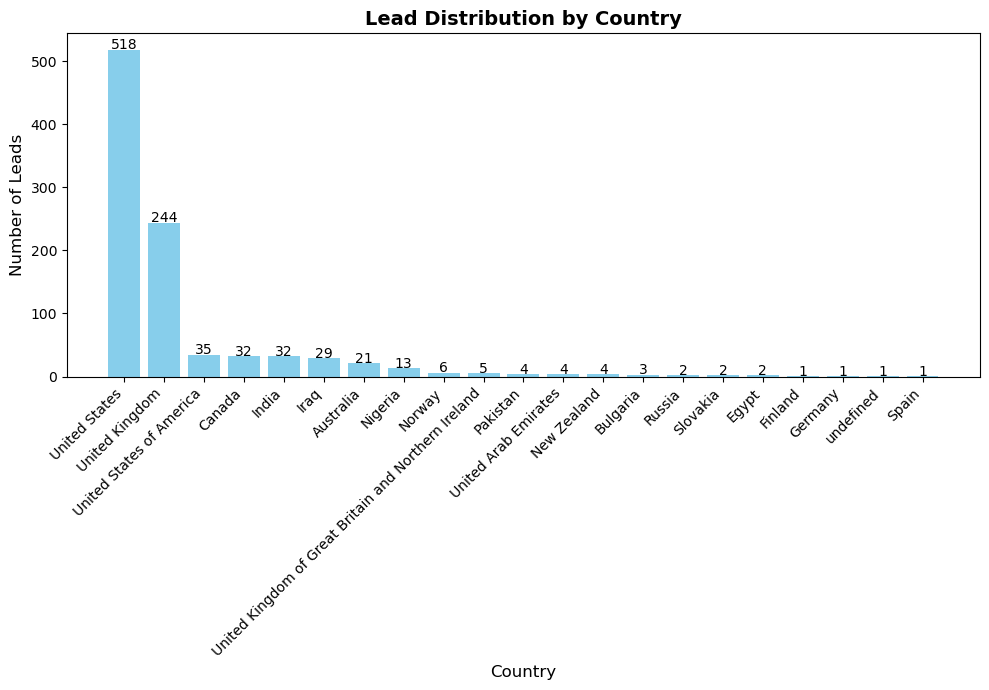

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))

# Bar chart
plt.bar(country_dist['Country'], country_dist['Count'], color='skyblue')

# Titles and labels
plt.title("Lead Distribution by Country", fontsize=14, fontweight='bold')
plt.ylabel("Number of Leads", fontsize=12)
plt.xlabel("Country", fontsize=12)

# Rotate x-axis labels for clarity
plt.xticks(rotation=45, ha='right')

# Add value labels on top of bars
for i, count in enumerate(country_dist['Count']):
    plt.text(i, count + 0.5, str(count), ha='center', fontsize=10)

plt.tight_layout()
plt.show()



In [83]:
# 6. City-Level Insights
city_dist = df['City'].value_counts().reset_index()
city_dist.columns = ['City', 'Count']

top5 = city_dist.head(5).copy()  
total_leads = df.shape[0]

# Calculate percentage
top5['Percentage'] = (top5['Count'] / total_leads * 100).round(2)

print("Top 5 Cities:\n", top5)

Top 5 Cities:
                     City  Count  Percentage
0  As Sulaymānīyah,SU,IQ     29        3.02
1          London,ENG,GB     27        2.81
2              Bengaluru     19        1.98
3               New York     15        1.56
4       Aberaeron,WLS,GB     14        1.46


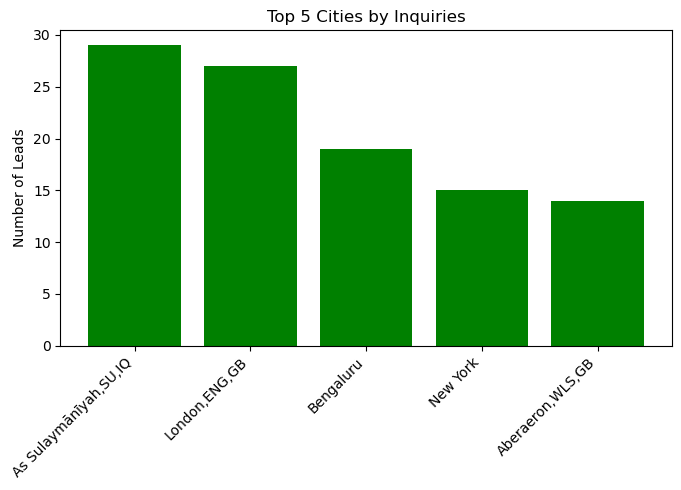

In [86]:
# Visualization with rotated X-axis labels
plt.figure(figsize=(7,5))  # Make figure wider
plt.bar(top5['City'], top5['Count'], color='green')
plt.title("Top 5 Cities by Inquiries")
plt.ylabel("Number of Leads")
plt.xticks(rotation=45, ha='right')  # Rotate labels and align to the right
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


In [87]:
#7. Geographic Strategy (Hint-based output, not pure query)
# Region focus = countries with highest counts
focus_countries = df['Country'].value_counts().head(3)

# Underserved = countries with very few leads
underserved = df['Country'].value_counts().tail(3)

print("Focus More on:\n", focus_countries)
print("\nUnderserved Markets:\n", underserved)

Focus More on:
 Country
United States               518
United Kingdom              244
United States of America     35
Name: count, dtype: int64

Underserved Markets:
 Country
Germany      1
undefined    1
Spain        1
Name: count, dtype: int64


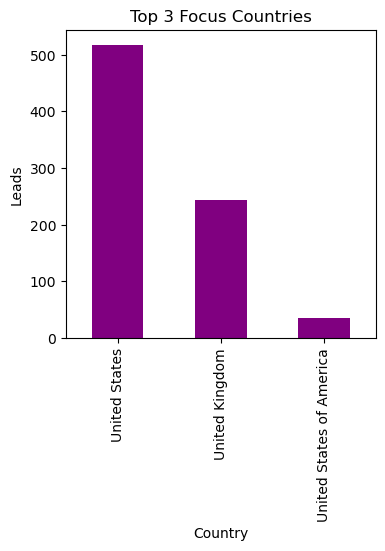

In [89]:
plt.figure(figsize=(4,4))
focus_countries.plot(kind='bar', color='purple')
plt.title("Top 3 Focus Countries")
plt.ylabel("Leads")
plt.show()

In [92]:
# 8. Education Level Distribution
edu_dist = (
    df['Education Level']                  # Select the column
    .fillna("Not Specified")              # Fill missing values
    .value_counts(normalize=True)         # Get relative frequencies
    .reset_index()                        # Convert to DataFrame
)

# Rename columns
edu_dist.columns = ['Education Level', 'Percentage']

# Convert to actual percentage and round
edu_dist['Percentage'] = (edu_dist['Percentage'] * 100).round(2)

# Display
print(edu_dist)



KeyError: 'Education Level'

In [94]:
import pandas as pd

# Step 1: Map Grade to Education Level
def grade_to_education(grade):
    if pd.isna(grade) or grade.strip() == '':
        return 'Not Specified'
    elif grade in ['KG', 'Kindergarten', 'Nursery']:
        return 'Pre-School'
    elif grade in ['1','2','3','4','5']:
        return 'Primary'
    elif grade in ['6','7','8']:
        return 'Middle'
    elif grade in ['9','10']:
        return 'High School'
    elif grade in ['11','12']:
        return 'Higher Secondary'
    elif grade.lower() in ['working professional', 'college', 'graduate', 'postgraduate']:
        return 'Working Professional'
    else:
        return 'Other/Not Specified'

# Apply mapping
df['Education_Level'] = df['Grade'].apply(grade_to_education)

# Step 2: Distribution table
edu_dist = df['Education_Level'].value_counts(dropna=False).reset_index()
edu_dist.columns = ['Education_Level', 'Count']

# Step 3: Calculate percentage
total_students = df.shape[0]
edu_dist['Percentage'] = (edu_dist['Count'] / total_students * 100).round(2)

print("📊 Education Level Distribution:")
print(edu_dist)

# Step 4: Working Professional vs K-12
# Define categories
def category_type(edu_level):
    if edu_level == 'Working Professional':
        return 'Working Professional'
    elif edu_level in ['Pre-School','Primary','Middle','High School','Higher Secondary']:
        return 'K-12'
    else:
        return 'Other/Not Specified'

df['Category'] = df['Education_Level'].apply(category_type)

category_dist = df['Category'].value_counts(normalize=True).reset_index()
category_dist.columns = ['Category', 'Percentage']
category_dist['Percentage'] = (category_dist['Percentage'] * 100).round(2)

print("\n📊 Percentage of Working Professionals vs K-12:")
print(category_dist)


📊 Education Level Distribution:
        Education_Level  Count  Percentage
0         Not Specified    512       53.33
1  Working Professional    290       30.21
2   Other/Not Specified    158       16.46

📊 Percentage of Working Professionals vs K-12:
               Category  Percentage
0   Other/Not Specified       69.79
1  Working Professional       30.21


In [97]:
# Question 8: Education Level Distribution 
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Fill missing grades as "Not Specified"
df['Grade'] = df['Grade'].fillna("Not Specified")

# Step 2: Count each grade
edu_dist = df['Grade'].value_counts().reset_index()
edu_dist.columns = ['Education_Level', 'Count']

# Step 3: Calculate percentage
total_leads = df.shape[0]
edu_dist['Percentage'] = (edu_dist['Count'] / total_leads * 100).round(2)

# Step 4: Display table
print("Education Level Distribution:")
print(edu_dist)

Education Level Distribution:
         Education_Level  Count  Percentage
0          Not Specified    512       53.33
1   Working Professional    209       21.77
2                College     81        8.44
3               Grade 11     26        2.71
4               Grade 12     22        2.29
5               Grade 10     18        1.88
6                Grade 9      9        0.94
7                Grade 4      8        0.83
8                Grade 2      8        0.83
9                Grade 7      8        0.83
10               Grade 5      7        0.73
11       Elderly Student      7        0.73
12               Grade 6      6        0.62
13               Grade 3      6        0.62
14               Grade 8      6        0.62
15               Grade 1      5        0.52
16      Masters 1st year      4        0.42
17      College 4th Year      3        0.31
18               Year 11      3        0.31
19      College 1st Year      2        0.21
20      College 3rd Year      2        0.21
21

 K-12 vs Working Professional Distribution:
               Category  Count  Percentage
0                  K-12    670       69.79
1  Working Professional    290       30.21


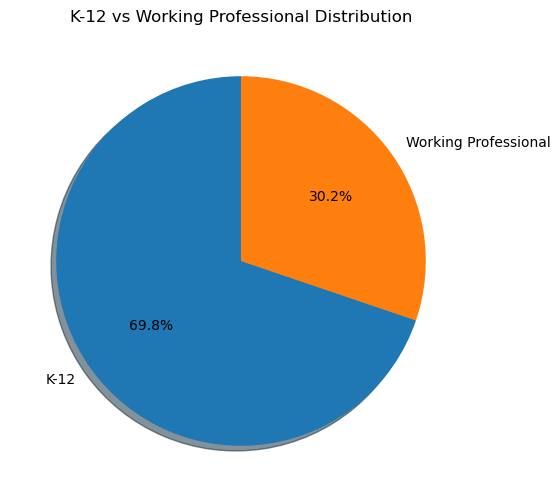

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

#Step 1: Map Grade to K-12 vs Working Professional
def categorize_student(grade):
    if pd.isna(grade) or grade.strip() == '':
        return 'Not Specified'
    elif grade.lower() in ['working professional', 'college', 'graduate', 'postgraduate']:
        return 'Working Professional'
    else:
        return 'K-12'

df['Category'] = df['Grade'].apply(categorize_student)

# Step 2: Count and percentage
category_dist = df['Category'].value_counts().reset_index()
category_dist.columns = ['Category', 'Count']
total = category_dist['Count'].sum()
category_dist['Percentage'] = (category_dist['Count'] / total * 100).round(2)

print(" K-12 vs Working Professional Distribution:")
print(category_dist)

# Step 3: Pie chart visualization
plt.figure(figsize=(6,6))
plt.pie(category_dist['Count'], labels=category_dist['Category'], 
        autopct=lambda p: '{:.1f}%'.format(p), startangle=90, shadow=True)
plt.title("K-12 vs Working Professional Distribution")
plt.show()


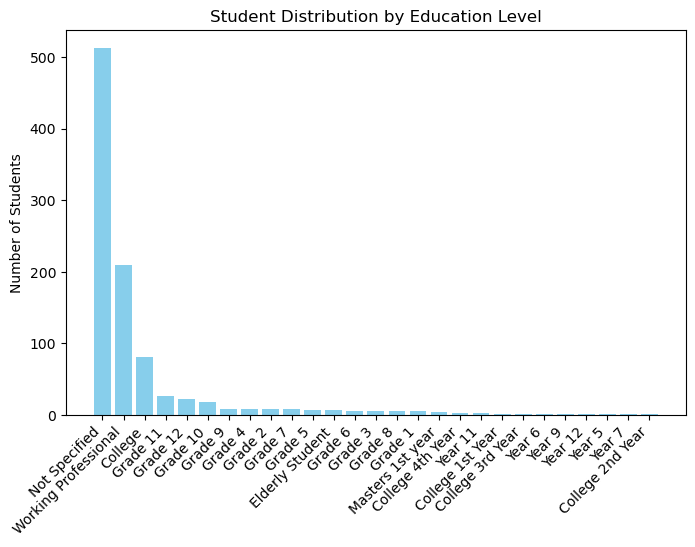

In [98]:
plt.figure(figsize=(8,5))
plt.bar(edu_dist['Education_Level'], edu_dist['Count'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Number of Students")
plt.title("Student Distribution by Education Level")
plt.show()

📊 Education Category Distribution (K-12 vs Working Professional):
     Education_Category  Count  Percentage
0                  K-12    512       53.33
1  Working Professional    448       46.67


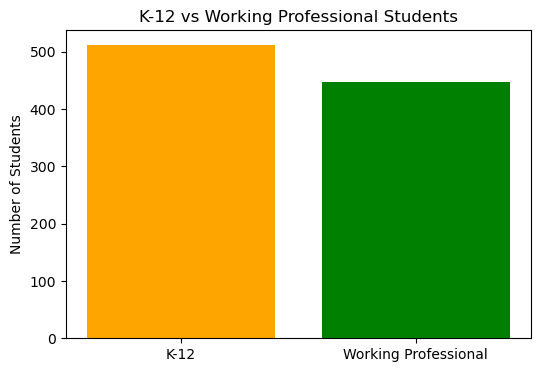

In [99]:
# Define K-12 and Working Professional categories
k12_grades = ['Kindergarten', '1st Grade', '2nd Grade', '3rd Grade', '4th Grade',
              '5th Grade', '6th Grade', '7th Grade', '8th Grade', '9th Grade',
              '10th Grade', '11th Grade', '12th Grade', 'Not Specified']

# Map each grade to category
def categorize_education(grade):
    if grade in k12_grades:
        return 'K-12'
    else:
        return 'Working Professional'

df['Education_Category'] = df['Grade'].apply(categorize_education)

# Count and percentage
edu_category_dist = df['Education_Category'].value_counts().reset_index()
edu_category_dist.columns = ['Education_Category', 'Count']
total_leads = df.shape[0]
edu_category_dist['Percentage'] = (edu_category_dist['Count'] / total_leads * 100).round(2)

# Display results
print("📊 Education Category Distribution (K-12 vs Working Professional):")
print(edu_category_dist)

# Optional visualization
plt.figure(figsize=(6,4))
plt.bar(edu_category_dist['Education_Category'], edu_category_dist['Count'], color=['orange', 'green'])
plt.ylabel("Number of Students")
plt.title("K-12 vs Working Professional Students")
plt.show()


In [101]:
#9. Subject Popularity
subject_pop = df['Subject'].value_counts(normalize=False).reset_index()
subject_pop.columns = ['Subject', 'Count']
subject_pop['Percentage'] = (subject_pop['Count']/subject_pop['Count'].sum()*100).round(2)

print(subject_pop)

                    Subject  Count  Percentage
0                   Singing    395       59.58
1                    Guitar    124       18.70
2                     Piano     57        8.60
3                      Math     19        2.87
4              AP Chemistry      6        0.90
5                   singing      5        0.75
6                    Violin      4        0.60
7            GCSE Chemistry      4        0.60
8                   Algebra      4        0.60
9             AP Psychology      3        0.45
10         Classical Violin      3        0.45
11                Algebra 2      3        0.45
12                   Python      3        0.45
13                   French      2        0.30
14                  Spanish      2        0.30
15                 GED Math      2        0.30
16  Artificial Intelligence      2        0.30
17                   guitar      2        0.30
18                  Physics      2        0.30
19                 SAT Math      2        0.30
20         Co

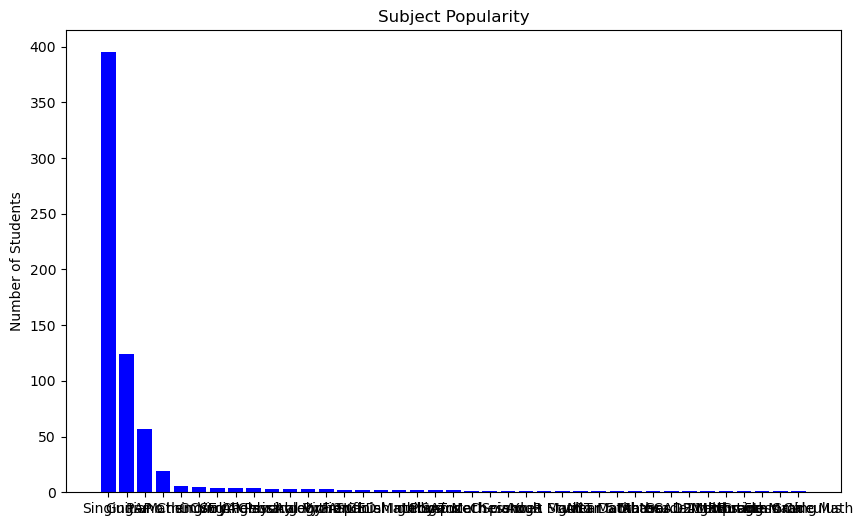

In [103]:
# Bar Chart
plt.figure(figsize=(10,6))
plt.bar(subject_pop['Subject'], subject_pop['Count'], color='blue')
plt.title("Subject Popularity")
plt.ylabel("Number of Students")
plt.show()

In [105]:
# 9 
import pandas as pd
# Fill missing subjects as 'Not Specified'
df['Subject'] = df['Subject'].fillna('Not Specified')

# Filter only relevant music subjects
music_subjects = ['Singing', 'Guitar', 'Piano']
subject_df = df[df['Subject'].isin(music_subjects)]

# Count and percentage
subject_dist = subject_df['Subject'].value_counts().reset_index()
subject_dist.columns = ['Subject', 'Count']
total_subject_leads = subject_dist['Count'].sum()
subject_dist['Percentage'] = (subject_dist['Count'] / total_subject_leads * 100).round(2)

# Display table
print(" Music Subject Popularity:")
print(subject_dist)

 Music Subject Popularity:
   Subject  Count  Percentage
0  Singing    395       68.58
1   Guitar    124       21.53
2    Piano     57        9.90


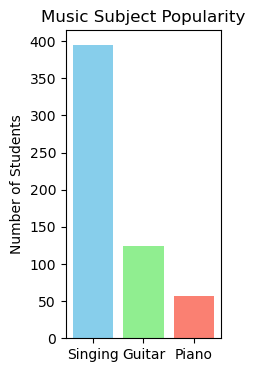

In [112]:
# Bar chart visualization
plt.figure(figsize=(2,4))
plt.bar(subject_dist['Subject'], subject_dist['Count'], color=['skyblue', 'lightgreen', 'salmon'])
plt.ylabel("Number of Students")
plt.title("Music Subject Popularity")
plt.show()

Overall Gender Preferences:
    Gender Preference  Percentage
0             Female       48.13
1               Both       39.50
2               Male       12.15
3  Prefer not to say        0.23
Gender Preferences by Subject:
                     Subject  Gender Preference  Count  Percentage
0           11th Grade Math               Both      1      100.00
1            5th Grade Math             Female      1      100.00
2            6th Grade Math             Female      1      100.00
3                  ACT Math             Female      1      100.00
4              AP Chemistry             Female      6      100.00
5             AP Psychology             Female      3      100.00
6                Accounting             Female      1      100.00
7                Adult Math               Both      1      100.00
8                   Algebra             Female      3       75.00
9                   Algebra               Male      1       25.00
10                Algebra 2             Female  

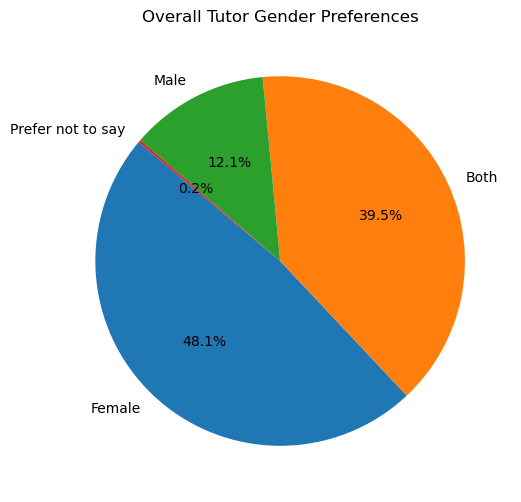

In [116]:
# Gender Preference Trends
gender_pref = df['Gender Preference'].value_counts(normalize=True).reset_index()
gender_pref.columns = ['Gender Preference', 'Percentage']
gender_pref['Percentage'] = (gender_pref['Percentage'] * 100).round(2)

print("Overall Gender Preferences:\n", gender_pref)



# By Subject
gender_by_subject = df.groupby(['Subject', 'Gender Preference']).size().reset_index(name='Count')
gender_by_subject['Percentage'] = gender_by_subject.groupby('Subject')['Count'].transform(lambda x: (x / x.sum() * 100).round(2))

print("Gender Preferences by Subject:\n", gender_by_subject)

# Pie Chart - Overall
plt.figure(figsize=(6,6))
plt.pie(
    gender_pref['Percentage'], 
    labels=gender_pref['Gender Preference'], 
    autopct=lambda p: f'{p:.1f}%',  # Show percentage
    startangle=140
)
plt.title("Overall Tutor Gender Preferences")
plt.show()

